In [5]:
import numpy as np
from skimage.io import imread
from skimage import filters
from pyclesperanto_prototype import imshow
from skimage.filters import gaussian
from skimage.restoration import rolling_ball 
from skimage.morphology import disk
import matplotlib.pyplot as plt
from skimage.filters import difference_of_gaussians
from skimage.morphology import white_tophat

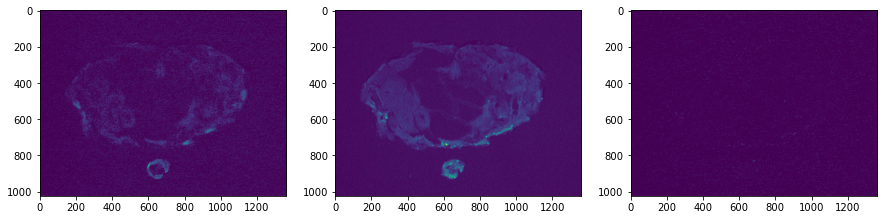

In [72]:
abdomen_raw = imread('/Users/sbandya/Desktop/dev/hemocyte_ImageSegmentation/input_images/current/35A_2_FITC.tif')
fig, axs = plt.subplots(1, 3, figsize=(15,15))

axs[0].imshow(abdomen_raw[:,:,0])
axs[1].imshow(abdomen_raw[:,:,1])
axs[2].imshow(abdomen_raw[:,:,2])


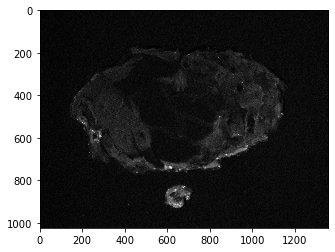

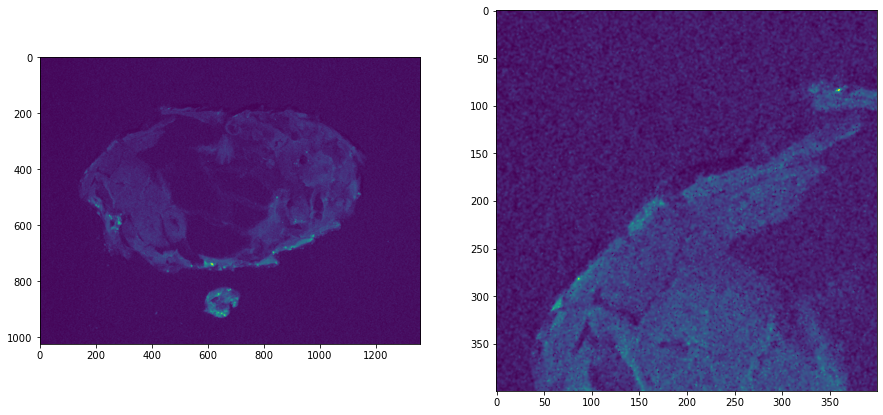

In [73]:
abdomen_raw = abdomen_raw[:,:,1]
imshow(abdomen_raw)
abdomen_raw_zoom = abdomen_raw[100:500,100:500]

fig, axs = plt.subplots(1, 2, figsize=(15,15))

axs[0].imshow(abdomen_raw)
axs[1].imshow(abdomen_raw_zoom)

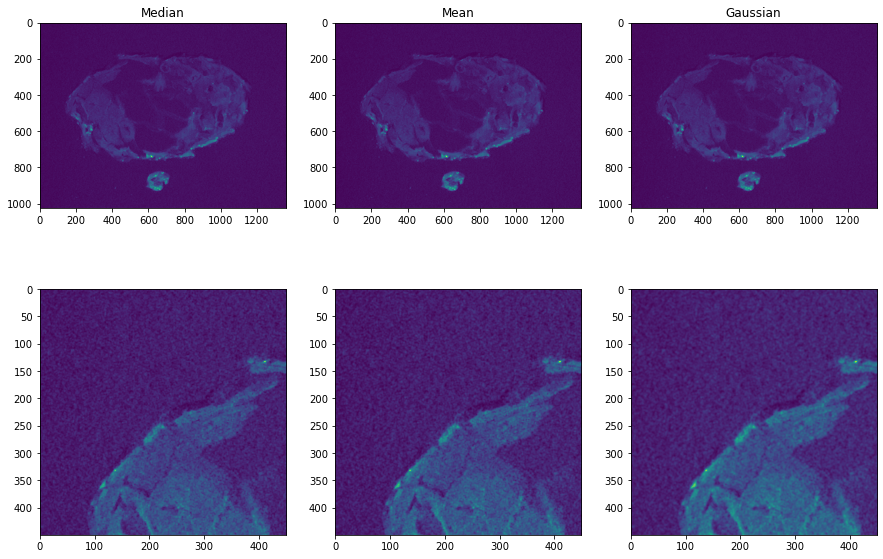

In [74]:
## Noise Filtering
median_filtered = filters.median(abdomen_raw, disk(1))
mean_filtered = filters.rank.mean(abdomen_raw, disk(1))
gaussian_filtered = filters.gaussian(abdomen_raw, sigma=1)

fig, axs = plt.subplots(2, 3, figsize=(15,10))

# first row
axs[0, 0].imshow(median_filtered)
axs[0, 0].set_title("Median")
axs[0, 1].imshow(mean_filtered)
axs[0, 1].set_title("Mean")
axs[0, 2].imshow(gaussian_filtered)
axs[0, 2].set_title("Gaussian")

# second row
axs[1, 0].imshow(median_filtered[50:500, 50:500])
axs[1, 1].imshow(mean_filtered[50:500, 50:500])
axs[1, 2].imshow(gaussian_filtered[50:500, 50:500])

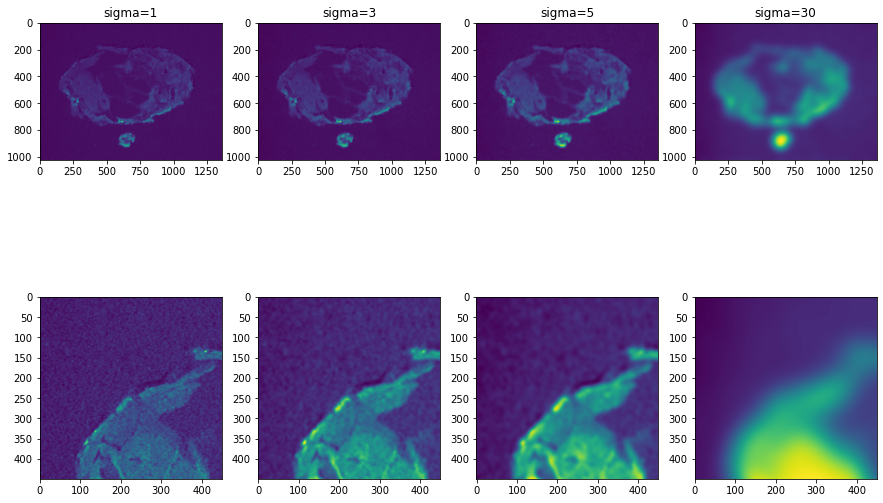

In [75]:

gaussian_filtered1 = filters.gaussian(abdomen_raw, sigma=1)
gaussian_filtered3 = filters.gaussian(abdomen_raw, sigma=3)
gaussian_filtered5 = filters.gaussian(abdomen_raw, sigma=5)
gaussian_filtered30 = filters.gaussian(abdomen_raw, sigma=30)

fig, axs = plt.subplots(2, 4, figsize=(15,10))

# first row
axs[0, 0].imshow(gaussian_filtered1)
axs[0, 0].set_title("sigma=1")
axs[0, 1].imshow(gaussian_filtered3)
axs[0, 1].set_title("sigma=3")
axs[0, 2].imshow(gaussian_filtered5)
axs[0, 2].set_title("sigma=5")
axs[0, 3].imshow(gaussian_filtered30)
axs[0, 3].set_title("sigma=30")

# second row
axs[1, 0].imshow(gaussian_filtered1[50:500, 50:500])
axs[1, 1].imshow(gaussian_filtered3[50:500, 50:500])
axs[1, 2].imshow(gaussian_filtered5[50:500, 50:500])
axs[1, 3].imshow(gaussian_filtered30[50:500, 50:500])

Text(0.5, 1.0, 'Rolling ball - Gaussfilt, s=3')

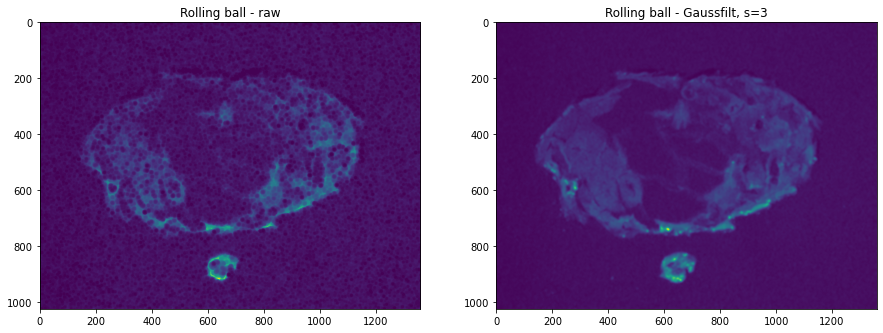

In [76]:
## Background removal - raw VS. gaussian filtered

bgroll_raw = rolling_ball(abdomen_raw, radius=10)
bgroll_g3 = rolling_ball(gaussian_filtered3, radius=10)


fig, axs = plt.subplots(1, 2, figsize=(15,10))

axs[0].imshow(bgroll_raw)
axs[0].set_title("Rolling ball - raw")

axs[1].imshow(bgroll_g3)
axs[1].set_title("Rolling ball - Gaussfilt, s=3")

Text(0.5, 1.0, 'radius=100')

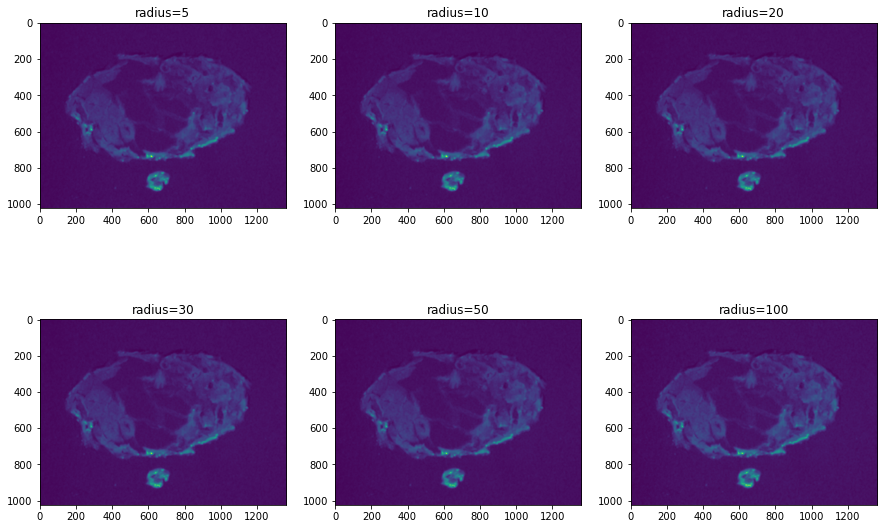

In [77]:
## Testing with different radii for rolling ball for gaussian filter (s=3)
bgroll_g3_r5 = rolling_ball(gaussian_filtered3, radius=5)
bgroll_g3_r10 = rolling_ball(gaussian_filtered3, radius=10)
bgroll_g3_r20 = rolling_ball(gaussian_filtered3, radius=20)
bgroll_g3_r30 = rolling_ball(gaussian_filtered3, radius=30)
bgroll_g3_r50 = rolling_ball(gaussian_filtered3, radius=50)
bgroll_g3_r100 = rolling_ball(gaussian_filtered3, radius=100)


fig, axs = plt.subplots(2,3, figsize=(15,10))

axs[0,0].imshow(bgroll_g3_r5)
axs[0,0].set_title("radius=5")
axs[0,1].imshow(bgroll_g3_r10)
axs[0,1].set_title("radius=10")
axs[0,2].imshow(bgroll_g3_r20)
axs[0,2].set_title("radius=20")

axs[1,0].imshow(bgroll_g3_r30)
axs[1,0].set_title("radius=30")
axs[1,1].imshow(bgroll_g3_r50)
axs[1,1].set_title("radius=50")
axs[1,2].imshow(bgroll_g3_r100)
axs[1,2].set_title("radius=100")

Text(0.5, 1.0, 'Rolling ball algorithm - radius=10')

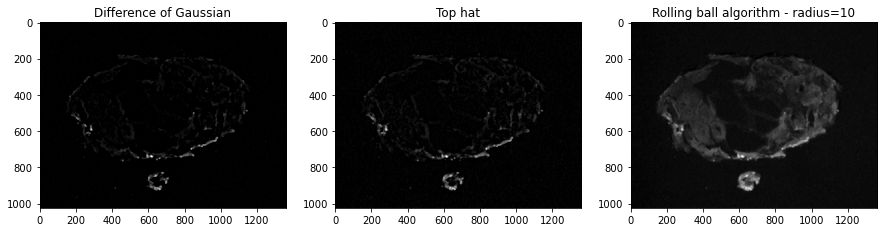

In [78]:
from skimage.filters import difference_of_gaussians
from skimage.morphology import white_tophat

# DoG
g3_dog = difference_of_gaussians(gaussian_filtered3, 0, 15)

# Top-Hat
g3_top_hat = white_tophat(gaussian_filtered3, disk(15))

fig, axs = plt.subplots(1, 3, figsize=(15,10))

# first row
imshow(g3_dog, plot=axs[0], min_display_intensity=0)
axs[0].set_title("Difference of Gaussian")
imshow(g3_top_hat, plot=axs[1])
axs[1].set_title("Top hat")
imshow(bgroll_g3_r10, plot=axs[2])
axs[2].set_title("Rolling ball algorithm - radius=10")


Text(0.5, 1.0, 'Rolling ball algorithm - radius=10')

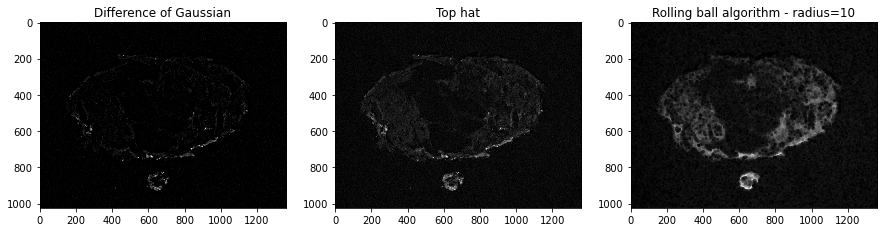

In [80]:
# DoG for raw 
raw_dog = difference_of_gaussians(abdomen_raw, 0, 15)

# Top-Hat
raw_top_hat = white_tophat(abdomen_raw, disk(15))

raw_bgroll_r10 = rolling_ball(abdomen_raw, radius=10)

fig, axs = plt.subplots(1, 3, figsize=(15,10))

# first row
imshow(raw_dog, plot=axs[0], min_display_intensity=0)
axs[0].set_title("Difference of Gaussian")
imshow(raw_top_hat, plot=axs[1])
axs[1].set_title("Top hat")
imshow(raw_bgroll_r10, plot=axs[2])
axs[2].set_title("Rolling ball algorithm - radius=10")


Text(0.5, 1.0, 'Binary')

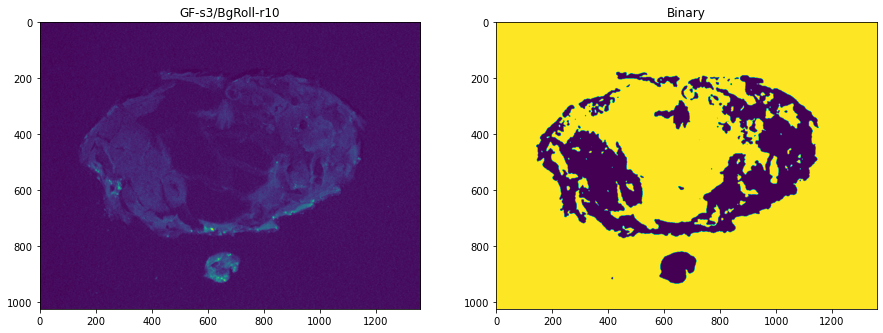

In [86]:

# thresholding
threshold_g3_bgroll_r10 = filters.threshold_otsu(bgroll_g3_r10)
binary_image = bgroll_g3_r10 <= threshold_g3_bgroll_r10

# Show original image and binary image side-by-side
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(abdomen_raw)
axs[0].set_title('GF-s3/BgRoll-r10')

axs[1].imshow(binary_image)
axs[1].set_title('Binary')


Text(0.5, 1.0, 'Filled/Dilated4')

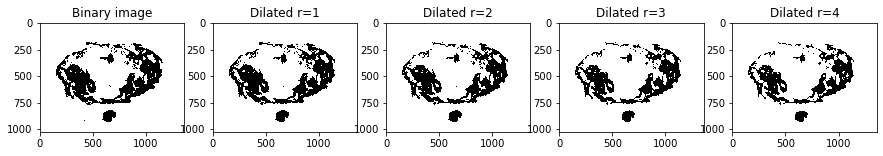

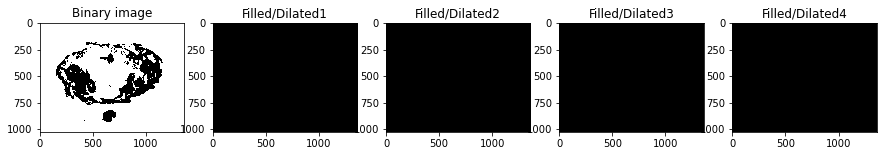

In [87]:
from skimage.morphology import disk, binary_dilation
from scipy.ndimage import binary_fill_holes

import pyclesperanto_prototype as cle
dilated1 = binary_dilation(binary_image, disk(1))
dilated2 = binary_dilation(binary_image, disk(2))
dilated3 = binary_dilation(binary_image, disk(3))
dilated4 = binary_dilation(binary_image, disk(4))

filled1 = binary_fill_holes(dilated1)
filled2 = binary_fill_holes(dilated2)
filled3 = binary_fill_holes(dilated3)
filled4 = binary_fill_holes(dilated4)


fig, axs = plt.subplots(1, 5, figsize=(15,15))

cle.imshow(binary_image, plot=axs[0])
axs[0].set_title('Binary image')
cle.imshow(dilated1, plot=axs[1])
axs[1].set_title('Dilated r=1')
cle.imshow(dilated2, plot=axs[2])
axs[2].set_title('Dilated r=2')
cle.imshow(dilated3, plot=axs[3])
axs[3].set_title('Dilated r=3')
cle.imshow(dilated4, plot=axs[4])
axs[4].set_title('Dilated r=4')

fig, axs = plt.subplots(1, 5, figsize=(15,15))
cle.imshow(binary_image, plot=axs[0])
axs[0].set_title('Binary image')
cle.imshow(filled1, plot=axs[1])
axs[1].set_title('Filled/Dilated1')
cle.imshow(filled2, plot=axs[2])
axs[2].set_title('Filled/Dilated2')
cle.imshow(filled3, plot=axs[3])
axs[3].set_title('Filled/Dilated3')
cle.imshow(filled4, plot=axs[4])
axs[4].set_title('Filled/Dilated4')


Text(0.5, 1.0, 'Binary')

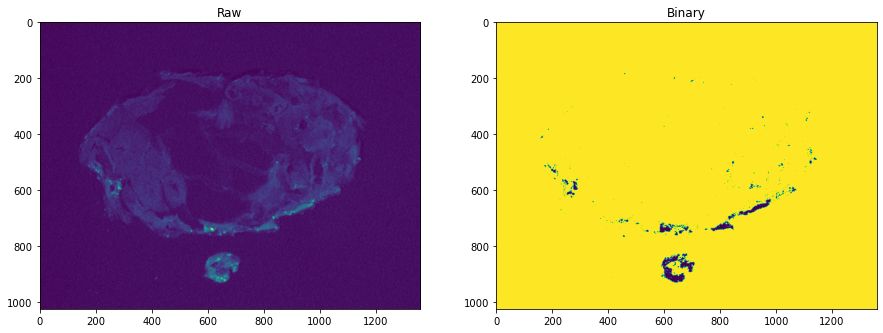

In [108]:
# thresholding
threshold_raw = filters.threshold_otsu(abdomen_raw)
binary_image_raw = abdomen_raw <=50

# Show original image and binary image side-by-side
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(abdomen_raw)
axs[0].set_title('Raw')

axs[1].imshow(binary_image_raw)
axs[1].set_title('Binary')


Text(0.5, 1.0, 'Binary')

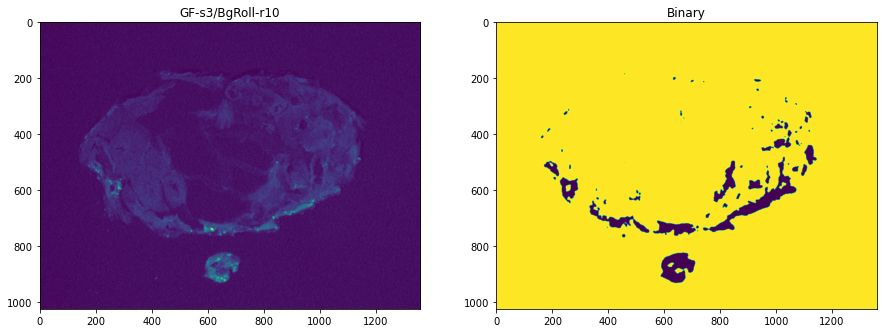

In [105]:
# thresholding
#threshold_g3_bgroll_r10 = filters.threshold_otsu(bgroll_g3_r10)
binary_image = bgroll_g3_r10 <= 0.12

# Show original image and binary image side-by-side
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(abdomen_raw)
axs[0].set_title('GF-s3/BgRoll-r10')

axs[1].imshow(binary_image)
axs[1].set_title('Binary')

In [94]:
threshold_g3_bgroll_r10

0.06954123329546762